In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [3]:
df = pd.read_csv("C:/Users/akank/Downloads/Business analytics/zomato.csv", encoding="ISO-8859-1")
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [6]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

# Data Cleaning

In [5]:
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# Fix data types
df['Restaurant ID'] = df['Restaurant ID'].astype('object')
df['Average Cost for two'] = df['Average Cost for two'].replace(',', '', regex=True).astype('int')
df['Votes'] = df['Votes'].astype('int')

# Handle missing values
df.dropna(subset=['Aggregate rating'], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)


In [7]:
# Drop any irrelevant columns
df.drop(['Address', 'Locality Verbose'], axis=1, inplace=True)

In [7]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

# Exploratiory Data Analysis

## Stacked Bar Plot

C:\Users\akank\AppData\Local\Temp\ipykernel_15268\3447409463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato_features['Has Table booking'] = zomato_features['Has Table booking'].replace({'Yes': 1, 'No': 0})
C:\Users\akank\AppData\Local\Temp\ipykernel_15268\3447409463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato_features['Has Online delivery'] = zomato_features['Has Online delivery'].replace({'Yes': 1, 'No': 0})


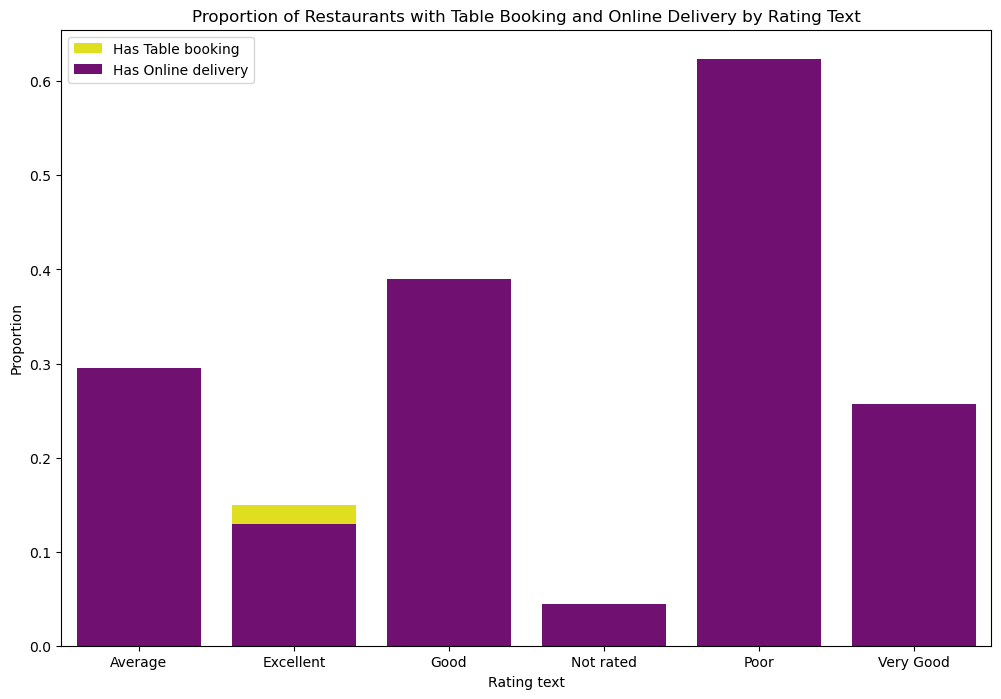

In [8]:
zomato_features = df[['Has Table booking', 'Has Online delivery', 'Rating text']]
zomato_features['Has Table booking'] = zomato_features['Has Table booking'].replace({'Yes': 1, 'No': 0})
zomato_features['Has Online delivery'] = zomato_features['Has Online delivery'].replace({'Yes': 1, 'No': 0})
zomato_features_grouped = zomato_features.groupby('Rating text').mean().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(data=zomato_features_grouped, x='Rating text', y='Has Table booking', color='yellow', label='Has Table booking')
sns.barplot(data=zomato_features_grouped, x='Rating text', y='Has Online delivery', color='purple', label='Has Online delivery')
plt.xlabel('Rating text')
plt.ylabel('Proportion')
plt.title('Proportion of Restaurants with Table Booking and Online Delivery by Rating Text')
plt.legend()


## Scatter Plot

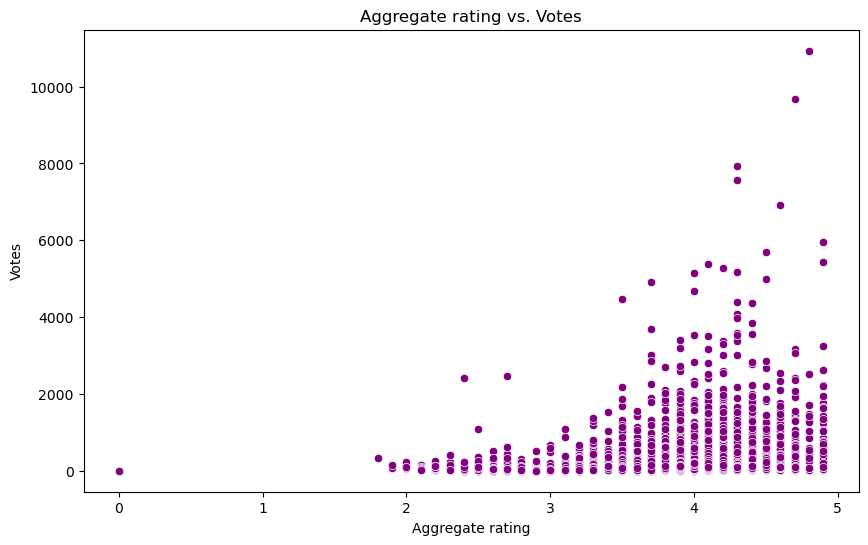

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Aggregate rating', y='Votes', data=df, color='purple')
plt.xlabel('Aggregate rating')
plt.ylabel('Votes')
plt.title('Aggregate rating vs. Votes')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Word Cloud

In [11]:
# Group the data by country code and cuisines and count the number of occurrences of each cuisine in each country
grouped_df = df.groupby(['Country Code', 'Cuisines']).size().reset_index(name='Counts')


In [12]:
from wordcloud import WordCloud

# Function to create a word cloud
def create_wordcloud(country_code):
    cuisines = grouped_df.loc[grouped_df['Country Code'] == country_code, 'Cuisines'].tolist()
    counts = grouped_df.loc[grouped_df['Country Code'] == country_code, 'Counts'].tolist()

    cuisine_count_dict = {}
    for i in range(len(cuisines)):
        cuisine_count_dict[cuisines[i]] = counts[i]

    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='tab10', min_font_size=10).generate_from_frequencies(cuisine_count_dict)

    # Display the generated image:
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


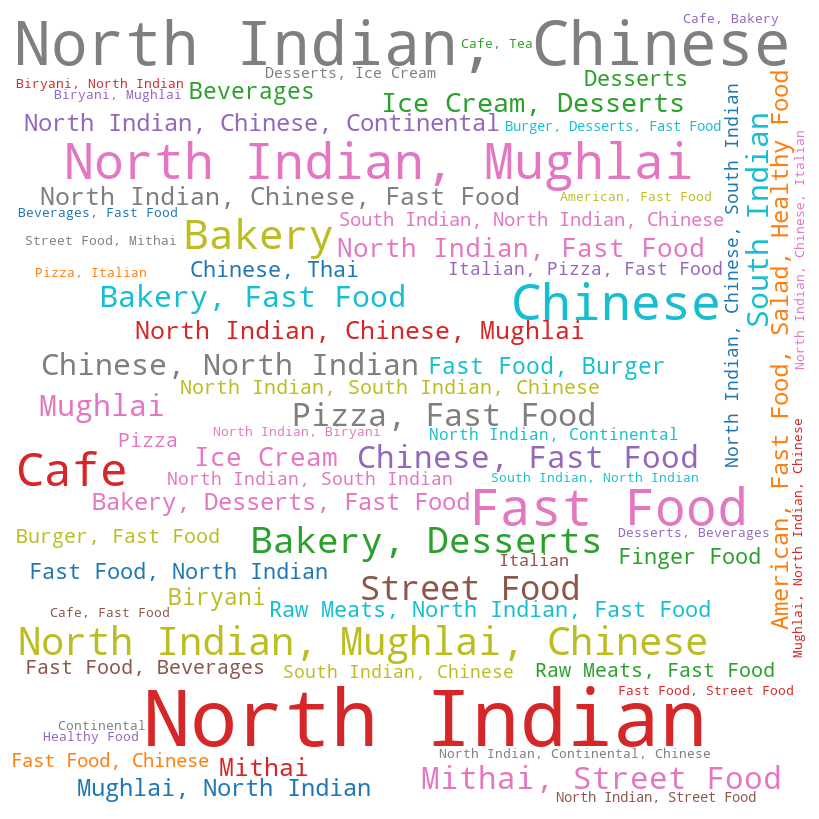

In [13]:
create_wordcloud(1)  # For India

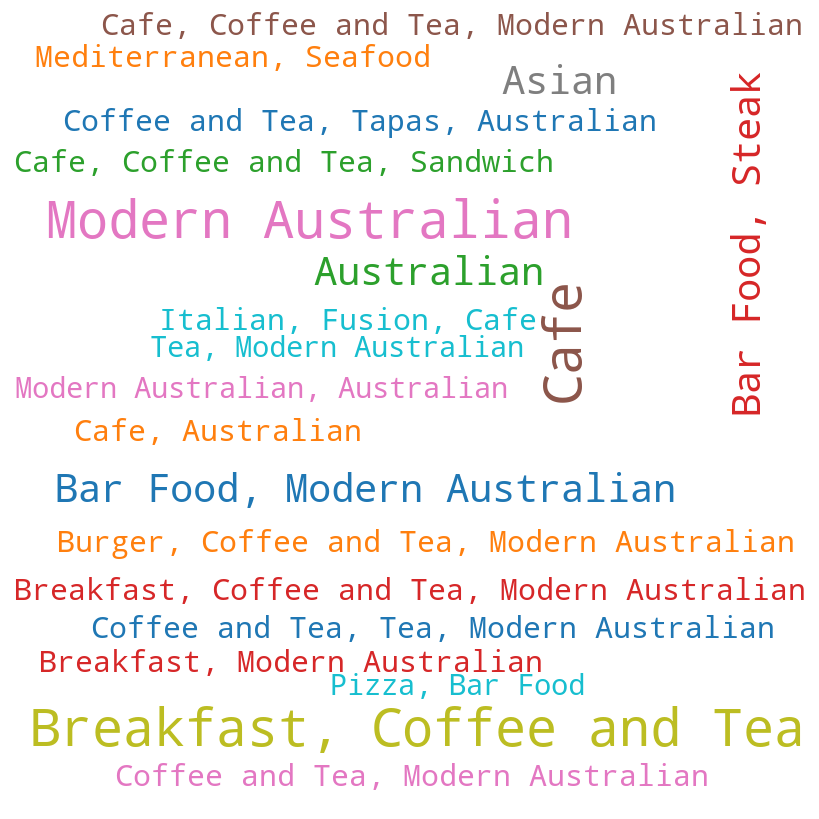

In [14]:
create_wordcloud(14)  # For United States

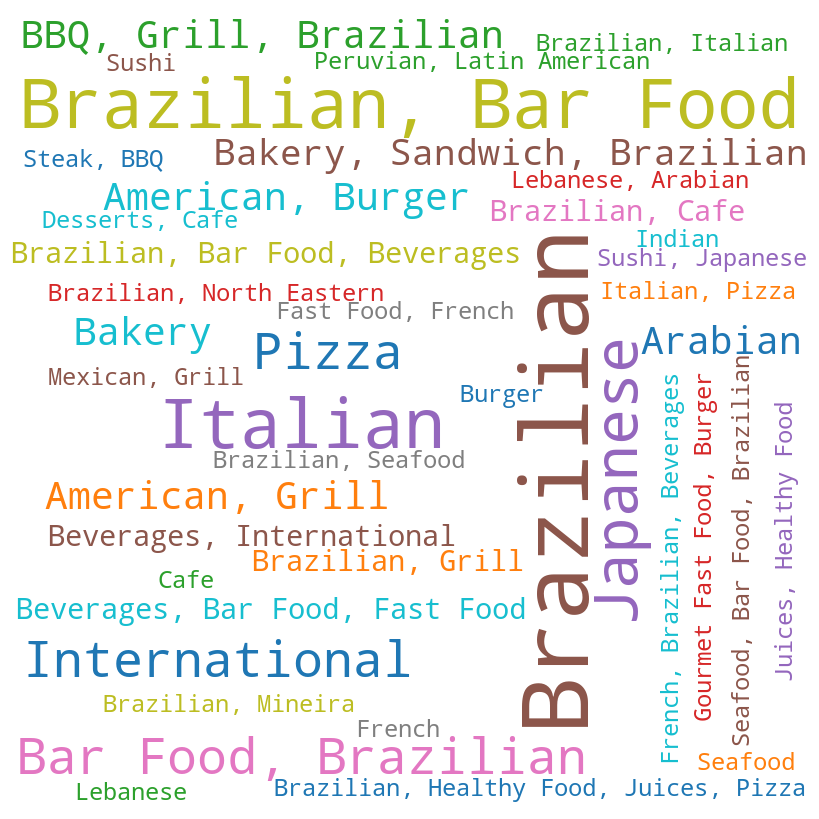

In [15]:
create_wordcloud(30)  # For United Arab Emirates

In [16]:
# Group the data by country code and count the number of restaurants in each country
country_counts = df.groupby('Country Code').agg({'Restaurant ID': 'count'}).reset_index()

# Sort the data by the number of restaurants in each country in descending order
country_counts = country_counts.sort_values('Restaurant ID', ascending=False)

# Calculate the percentage of restaurants in each country
country_counts['Percentage'] = country_counts['Restaurant ID'] / sum(country_counts['Restaurant ID']) * 100

# Print the country with the highest number of restaurants and its percentage of the overall market
print('Country with the highest number of restaurants: ', country_counts.iloc[0]['Country Code'], ', Percentage of overall market: ', round(country_counts.iloc[0]['Percentage'], 2), '%')


Country with the highest number of restaurants:  1.0 , Percentage of overall market:  90.59 %


## Stacked Bar Plot

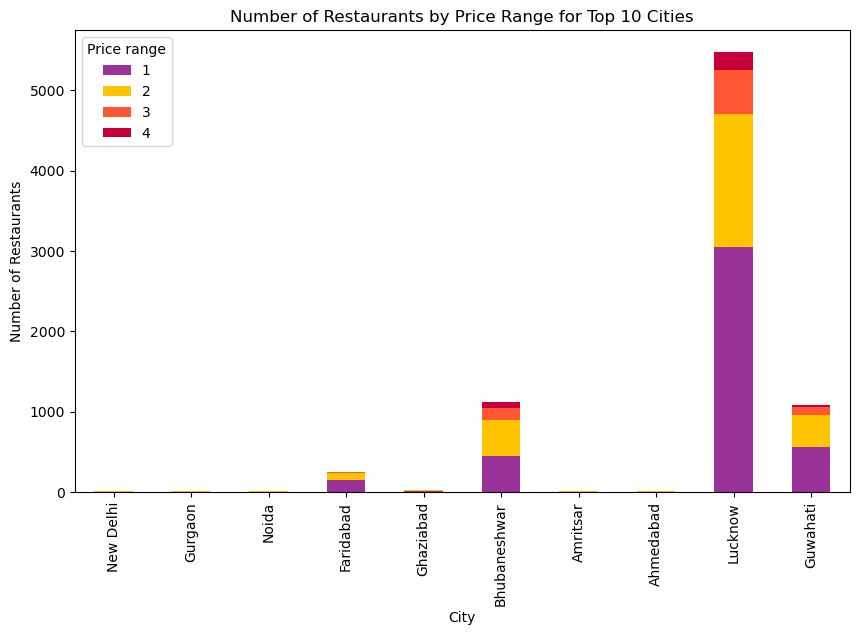

In [11]:
# get the top 10 cities based on the number of restaurants
top_cities = df['City'].value_counts().head(10).index.tolist()

# create a new dataframe with the data for the top 10 cities
df_top_cities = df[df['City'].isin(top_cities)]

# create a pivot table with the count of restaurants for each city and price range
pivot_table = pd.pivot_table(df_top_cities, values='Restaurant ID', index='City', columns='Price range', aggfunc='count', fill_value=0)

# create a stacked bar graph
colors = ['#993399', '#FFC300', '#FF5733', '#C70039']
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# set the title and axes labels
plt.title('Number of Restaurants by Price Range for Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')

# set the x-tick labels vertically
plt.xticks(rotation=0)
plt.xticks(range(len(top_cities)), top_cities, rotation=90)

# show the plot
plt.show()


## Choropleth Map 

In [18]:
import plotly.express as px

In [19]:
# map country codes to country names
country_dict = {162: 'Philippines', 30: 'Brazil', 216: 'USA', 14: 'USA', 37: 'Canada', 184: 'Singapore',
                214: 'UAE', 1: 'India', 94: 'Indonesia', 148: 'New Zealand', 215: 'UK', 166: 'Qatar',
                189: 'South Africa', 191: 'Sri Lanka', 208: 'Turkey'}
df['Country'] = df['Country Code'].map(country_dict)

# filter data for the selected countries
selected_countries = [162, 30, 216, 14, 37, 184, 214, 1, 94, 148, 215, 166, 189, 191, 208]
df_selected = df[df['Country Code'].isin(selected_countries)]

# create choropleth map
fig = px.choropleth(df_selected, locations='Country', locationmode='country names', 
                    color='Average Cost for two', projection='natural earth',
                    color_continuous_scale=['purple', 'yellow', 'orange'], range_color=[0, 100])

# update layout
fig.update_layout(title='Average Cost for Two by Country and Currency',
                  font=dict(size=12),
                   height=500,
                  width=800,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)')

fig.show()
